<a href="https://colab.research.google.com/github/CARLOS-DANIEL-GIL-GUZMAN/Taller-1/blob/main/Parcial%201%20Carlos_Daniel_Gil_Guzman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Punto b)

b) Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de *5kHz*, aplicado a la señal continua *x(t) = 3 cos(1000πt) + 5 sin(2000πt) + 10 cos(11000πt)*?. Realizar la simulación del proceso de discretización. En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.

El siguiente código representa la señal continua *x(t)* y su versión discreta *x[n]* luego de ser muestreada. Utilizando la frecuencia de muestreo *fs* y la duración de la señal continua, se genera la señal continua *x(t)* en ese dominio de tiempo.
Posteriormente, se discretiza la señal continua en el mismo dominio de tiempo para obtener la versión discreta *x[n]*.

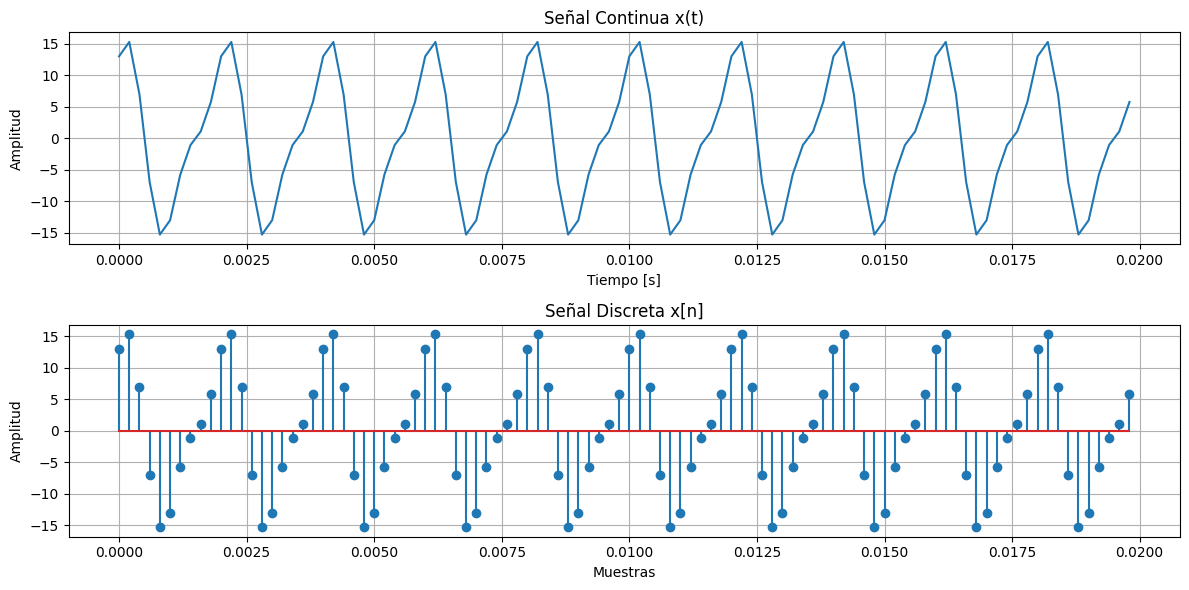

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua x(t)
def x(t):
    return 3 * np.cos(1000*np.pi*t) + 5 * np.sin(2000*np.pi*t) + 10 * np.cos(11000*np.pi*t)

# Frecuencia de muestreo
fs = 5000  # 5 kHz

# Duración de la señal continua
duración = 0.02  # 20 ms

# Crear el eje de tiempo para la señal continua
t_continuo = np.arange(0, duración, 1/fs)

# Muestrear la señal continua
x_discreto = x(t_continuo)

# Crear el eje de tiempo para la señal discreta
t_discreto = np.arange(0, duración, 1/fs)

# Graficar la señal continua y la señal discreta
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_continuo, x(t_continuo))
plt.title('Señal Continua x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(t_discreto, x_discreto)
plt.title('Señal Discreta x[n]')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


En el caso anterior el Ω está por fuera del rango dado por *-π<x<π*, por lo que no se cumple *Nyquist* y decimos que es un *ALIASING (Copia)*. Para corregir esto, tomamos una nueva frecuencia de muestreo *fs* para tener un *Ω_original* dentro del rango anteriormente mencionado y cumpliendo *Nyquist*.

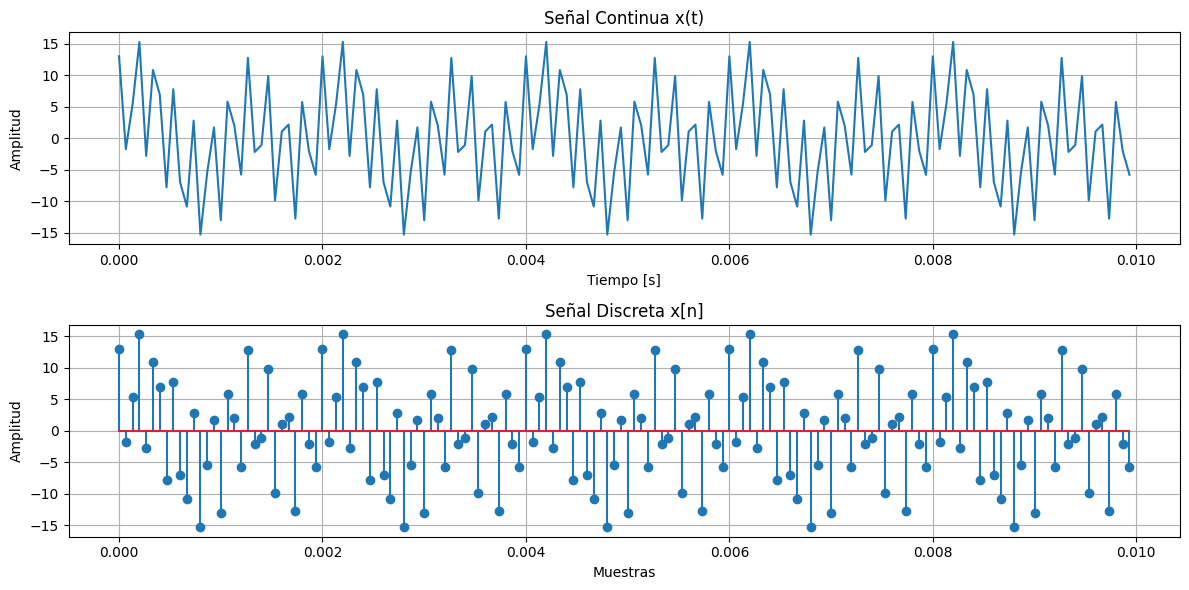

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal continua x(t)
def x(t):
    return 3 * np.cos(1000*np.pi*t) + 5 * np.sin(2000*np.pi*t) + 10 * np.cos(11000*np.pi*t)

# Frecuencia de muestreo
fs = 15000  # 15 kHz

# Duración de la señal continua
duracion = 0.01  # 10 ms

# Crear el eje de tiempo para la señal continua
t_continuo = np.arange(0, duracion, 1/fs)

# Muestrear la señal continua
x_discreto = x(t_continuo)

# Crear el eje de tiempo para la señal discreta
t_discreto = np.arange(0, duracion, 1/fs)

# Graficar la señal continua y la señal discreta
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t_continuo, x(t_continuo))
plt.title('Señal Continua x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(t_discreto, x_discreto)
plt.title('Señal Discreta x[n]')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

#Punto c)

a) Implemente una simulación para encontrar la salida del sistema lineal e invariante al tiempo *H{.}*, con respuesta al escalón *h∈[n] = {2,4,1,5,0,10}*,n ∈ Z, ante la entrada análoga en corriente *x(t)= 20(cos(t/3) + cos(t/4))*[A]. A: Amperios. Incluya los acondicionamientos necesarios de discretización y cuantización, asumiendo un microprocesador de 4 bits con entrada análoga de 4mA a 20mA.

In [7]:
def my_ceropend(x,xhmax=0.02,xhmin=0.004):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

El siguiente código genera una señal cuasiperiódica combinando dos señales cosenoidales. Luego, aplica una transformación a esta señal para ajustar sus valores máximos y mínimos según ciertos criterios. Finalmente, se grafican tanto la señal original como la transformada para su visualización

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

T1 = 6*np.pi #perido señal 1
T2 = 8*np.pi #perido señal 2
F1 = 1/T1
F2 = 1/T2
T = 24*np.pi #perido cuasiperiódica
Fs = 10*max(F1,F2) #frecuencia muestreo
t = np.arange(0,3*T,1/Fs) #vector de tiempo, se muestran 3 periodos
x = 20*(np.cos(t/3)+np.cos(t/4))
xhmax = 0.02
xhmin = 0.004
xh = my_ceropend(x,xhmax, xhmin).reshape(-1,1)#aplicar cero y pendiente de 0 a 10
#asegurar vector columna

El siguinte código realiza la cuantización de una señal continua transformada *xh* utilizando un número específico de bits para representar los valores cuantizados. Comienza calculando la resolución de cuantización y generando un conjunto de estados posibles. Luego, asigna a cada punto de la señal transformada el estado más cercano en el conjunto de estados, produciendo así la señal cuantizada. En pocas palabras convierte la señal continua en una versión discreta.

In [23]:
#cuantizar
nbits = 4 #número bits
Ne = 2**nbits #cantidad de estados
res = (xhmax-xhmin)/Ne #resolución cuantización
ve = np.arange(xhmin,xhmax,res).reshape(-1,1)#vector de estados
#asegurar vector columna

xq = np.zeros(len(xh)) #señal cuantizada
for i in range(len(xh)): #recorrer señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados

<ipython-input-23-1e38425e4ccf>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1),ve))] #se cálcula la distancia desde cada punto al vector de estados


Se procede a graficar las señales cuantizadas:

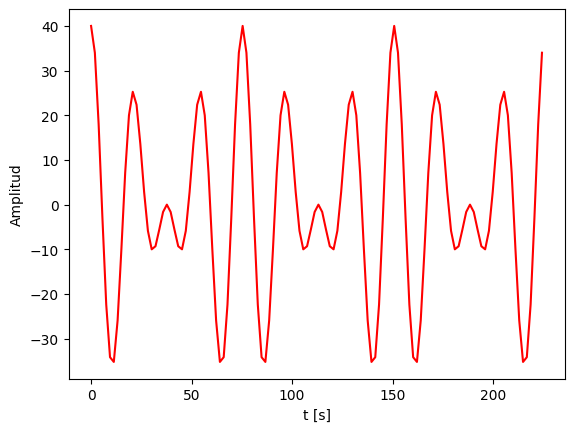

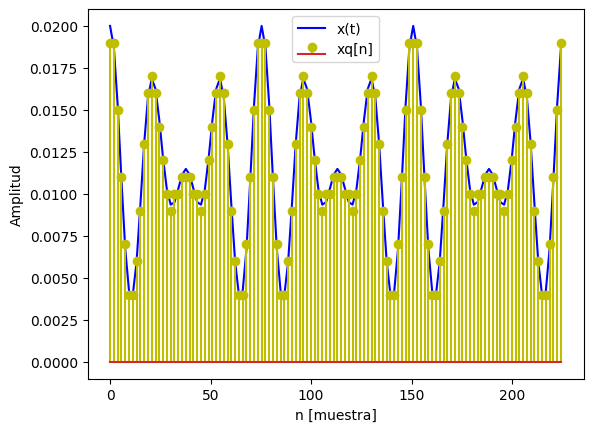

In [24]:
#gráficas de señales
plt.plot(t,x,'r',label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()
plt.plot(t,xh,'b',label='x(t)')
plt.stem(t,xq,'y',label='xq[n]')
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

El siguiente código toma la respuesta al escalón de un sistema discreto y calcula la respuesta al impulso del mismo utilizando la diferencia entre elementos sucesivos de la respuesta al escalón(es equivalente a calcular la respuesta al impulso como la derivada discreta de la respuesta al escalón).

In [25]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit
print(h)

[ 2 -3  4 -5 10]


Ahora se procede a convolucionar las dos señales discretas *xq* y *h* y se grafican.

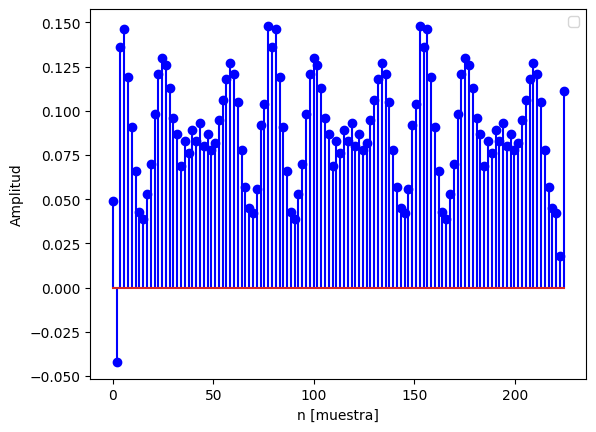

In [26]:
y = np.convolve(xq,h,mode='same')#respuesta del slit -> se asegura tamaños iguales con mode=same
#graficar señal
plt.stem(t,y,'b',label='')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()